# Perform 2A

In this assignment you will demonstrate your mastery selecting and transforming data using the Numpy and Pandas Python libraries. You are welcome to refer to the [Numpy documentation](https://numpy.org/doc/stable/) and [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html) to help solve the problems, as well as any class materials such as Prepare and Practice resources.

*You must complete the Perform assignments independently.* You should not discuss the Perform assignments with any other classmates until after grades have been returned. You may not show your solutions to other students and should not view other solutions.

We will manually grade your code to check that you are taking advantage of the features of Numpy and Pandas, as opposed to using for loops.

In [1]:
# Run but do not modify this code to import libraries

# Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 1: Nearby Points
A classic problem in computational geometry with many applications in machine learning is *nearest neighbor search* in which we are given a set of points and a query (which is also a point) and asked to find the closest points to the query. The problem has many variants which are used for classification in machine learning and collaborative filtering in recommender systems. In this part you will code a few variants using Numpy.

Start by running the code cell below. It will generate 100 random points (in two dimensions) as a 100 row by 2 column Numpy array `points`. Each row corresponds to a point, the first column (column index 0) contains the x-value, and the second column (column index 1) contains the y-value. Similarly, the code generates a random query point as a one-dimensional Numpy array `query` of length two, where the first value is the x-value and the second is the y-value. This data is visualized in a scatter plot where `points` are represented as smaller blue dots and `query` is represented as a larger orange dot.

Throughout this part we will use Euclidean distance (standard high school geometry distance). Recall that the distance formula between two points $(x_1, y_1)$ and $(x_2, y_2)$ is $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$.

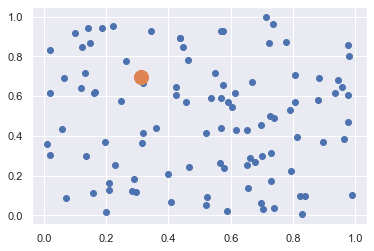

In [2]:
# Run but do not modify this code
n = 100
np.random.seed(0) # so you get the same results each time

points = np.random.rand(n, 2)
query = np.random.rand(2)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

### Question 1: k-nearest neighbors (6 points)
The code cell below defines a `get_knn` function that takes `points` and `query` as defined above, along with a positive integer parameter `k`. It should return the `k` nearest neighbors of `query` among `points`. The `k` nearest neighbors are the `k` points of minimum distance to `query`. 

The function is not correctly implemented (currently it just returns the first `k` points). Fix the implementation of `get_knn` so that it works as intended. You may find the Numpy `argsort` function to be helpful, you can find its [documentation here](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html).  

You can run the next code cell to visualize your results. It will draw orange lines from `query` to the `k=10` points returned by your `get_knn` function. You do not need to report anything else for this question beyond your implementation, but please run the visualization to show your results.

In [90]:
def get_knn(points, query, k):
    
    dist = np.linalg.norm(points-query, axis=1)
    
    return points[np.argsort(dist)][:k]

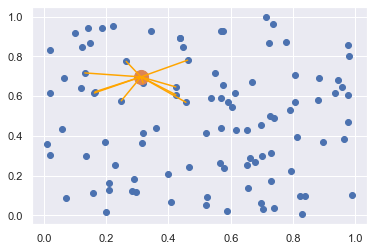

In [91]:
# Run but do not modify this code to test your 
# implementation and visualize your final result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

knn = get_knn(points, query, 10)
for point in knn:
    plt.plot(*zip(query, point), color='orange')

### Question 2: Points within radius (6 points)
The code cell below defines a `get_ball` function that takes `points` and `query` as defined above, along with a positive integer parameter `r`. It should return *all* of the `points` that are within distance `r` of `query` (that is, points within a circle of radius `r` around `query`).

The function is not correctly implemented (currently it just returns the first point). Fix the implementation of `get_ball` so that it works as intended.

You can run the next code cell to visualize your results. It will draw orange lines from `query` to the points within distance `r=0.5` from `query` returned by your `get_ball` function. You do not need to report anything else for this question beyond your implementation, but please run the visualization to show your results.

In [123]:
def get_ball(points, query, r):
    dist = np.linalg.norm(points-query,axis=1)
    
    return (points[dist<r])

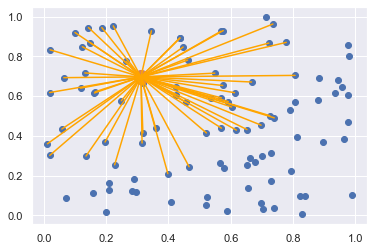

In [124]:
# Run but do not modify this code to test your 
# implementation and visualize your final result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

ball = get_ball(points, query, 0.5)

for point in ball:
    plt.plot(*zip(query, point), color='orange')

## Part 2: Election
In this part we are working with the `president_2020.csv` dataset, imported below as a Pandas Dataframe called `df`. It contains numbers of votes cast for the democratic and republican political party candidates for president in the 2020 election in each state.  For the purposes of this dataset, the district of columbia is listed as its own state. The `d_votes` column contains the number of votes for the democratic candidate and the `r_votes` column contains the number of votes for the republican candidate. Note that exact values may differ slightly from official certified counts; please use this dataset for your analysis.

In [125]:
# Run but do not modify this cell to import the data and view the first five rows
df = pd.read_csv("president_2020.csv", index_col=0)
df.head()

,d_votes,r_votes
new jersey,2608335,1883274
mississippi,539398,756764
montana,244786,343602
texas,5259126,5890347
north dakota,114902,235595


### Question 3 (6 points)
Compute the following three new columns and add them to the dataframe `df`. For any percents, you can simply express the values as a fraction between 0 and 1 (e.g., 0.5 for 50%).

1. A `total` column containing the total number of votes cast for democratic or republican candidates in each state.
2. A `d_percent` column containing the percent of the `total` votes that were cast for the democratic candidate in each state. 
3. A `r_percent` column containing the percent of the `total` votes that were cast for the republican candidate in each state.

When you are finished, run `df.head()` to preview the first five rows of your results. You don't need to write anything else to answer this question, but make sure the preview of the first five results is visible in the document you turn in.

In [126]:
# Put your code for question 3 here
df["total"] = df["d_votes"]+df["r_votes"]
df["d_percent"] = df["d_votes"]/df["total"]
df["r_percent"] = df["r_votes"]/df["total"]

In [160]:
# Run this code to see the first five rows
# of your dataframe with the new columns
df.head()

,d_votes,r_votes,total,d_percent,r_percent
new jersey,2608335,1883274,4491609,0.580713,0.419287
mississippi,539398,756764,1296162,0.416150,0.583850
montana,244786,343602,588388,0.416028,0.583972
texas,5259126,5890347,11149473,0.471693,0.528307
north dakota,114902,235595,350497,0.327826,0.672174


### Question 4 (12 points, 2 each and 2 manual grading)

Answer the following questions about the dataset. For some questions you may find the Pandas `idxmax()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html)) and `idxmin()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)) methods to be helpful (though they are not necessary).

1. How many total votes are there across all of the states? Put this in the variable `q4_1`.

2. Which party received more total votes, and how many more did they receive than their opponent? In `q4_2p` put the string `'d'` for democratic or `'r'` for republican and put the number of votes in `q4_2v`.

3. For each party, in how many states did they receive more votes than their opponent? Use `q4_3d` for democratic and `q4_3r` for republican.

4. Which state had the largest margin of victory in terms of the difference in the number of votes cast for the two candidates, and what is that difference? Use `q4_4s` for the state and `q4_4d` for the difference.

5. Which state had the smallest margin of victory in terms of the difference in the number of votes cast for the two candidates and what is that difference? Use `q4_5s` for the state and `q4_5d` for the difference.

In [230]:
# Put your code for question 4 here. Feel free to add 
# additional code cells as necessary.
# Use 'int' type for results of questions, not 'numpy.int64'
q4_1 = int(df.sum(axis=0)["total"])
q4_2p = "d" if (df.sum(axis=0))["d_votes"] > (df.sum(axis=0))["r_votes"] else "r"
q4_2v = int(np.max(df.sum(axis=0)[["d_votes","r_votes"]]))
q4_3d = int(np.sum((df["d_votes"]>df["r_votes"])))
q4_3r = int(np.sum((df["r_votes"]>df["d_votes"])))
q4_4s = np.abs(df["r_votes"]-df["d_votes"]).idxmax()
q4_4d = int(np.max(np.abs(df["r_votes"]-df["d_votes"])))
q4_5s = (np.abs(df["r_votes"]-df["d_votes"])).idxmin()
q4_5d = int(np.min(np.abs(df["r_votes"]-df["d_votes"])))

### Question 5 (10 points, 2 each and 2 manual grading)
Answer the following questions about the dataset. It may be helpful (though not necessary) to recall that you can get the explicit indices of a Pandas Dataframe or Series with the `.index` attribute ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html)).

1. List all of the states in which more than 60% of votes were cast for the democratic candidate. Save the result in a list (not numpy.ndarray) of string `q5_1`.

2. List all of the states in which more than 60% of votes were cast for the republican candidate. Save the result in a list (not numpy.ndarray) of string `q5_2`.

3. List all of the states with more than 2 million total votes, of which more than 60% were cast for the democratic candidate. Save the result in a list (not numpy.ndarray) of string `q5_3`.

4. List all of the states with more than 2 million total votes, of which more than 60% were cast for the republican candidate. Save the result in a list (not numpy.ndarray) of string `q5_4`.

In [215]:
# Put your code for question 5 here. Feel free to add 
# additional code cells as necessary
q5_1 = list(df[df["d_percent"]>0.6].index)
q5_2 = list(df[df["r_percent"]>0.6].index)
q5_3 = list(df[(df["total"]>2000000) & (df["d_percent"] > 0.6)].index)
q5_4 = list(df[(df["total"]>2000000) & (df["r_percent"] > 0.6)].index)